<a href="https://colab.research.google.com/github/AnnaLz/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementação de um Perceptron utilizando Python**

---

###Tarefa 05 - Inteligência Artificial

Anna Luiza Pereira Rosa - 2019004090<br>
João Vitor de Faria - 2019006030

#Exercício

---




*   Utilizando o módulo `make_blobs`, gere dois novos conjuntos alterando o parâmetro `random_state` para o valor de 6 e 30.
*   Varie o número de épocas do Perceptron em 10, 50 e 100 e a taxa de aprendizado em 0.02 e 0.003.
*   Para cada base gerada e cada configuração de Perceptron, mostre o gráfico das atualizações por época e a fronteira de decisão gerada, explicando o comportamento do modelo em função da convergência.

---

#Implementação

### Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

###Definição da classe Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0:] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

###Definição da base de dados

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


###Obtenção dos valores de entrada e saída e distribuição dos dados

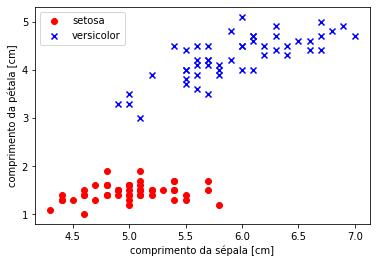

In [ ]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('comprimento da sépala [cm]')
plt.ylabel('comprimento da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

###Instanciando um objeto com a classe Perceptron

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)



###Quantidade de atualizações de pesos ocorreram em cada época do modelo

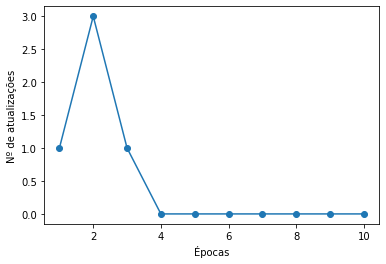

In [ ]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

###Plotagem da região de decisão do modelo

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


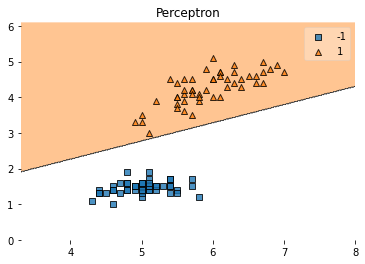

In [ ]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

###Utilizando a `scikit-learn` para geração de conjuntos de dados artificiais

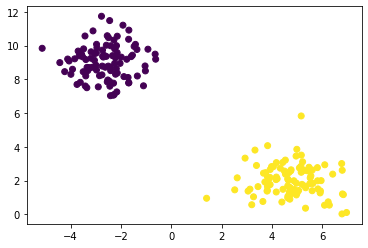

In [ ]:
blobs = make_blobs(n_samples=200, n_features=2, centers=2, random_state=42)
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

###Instanciando um Perceptron com taxa de aprendizado de 0.02 e número de épocas igual a 10

In [ ]:
ppn = Perceptron(n_iter=10, eta=0.02)
X = blobs[0] # Entrada de dados
y = blobs[1] # Saída
# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1
ppn.fit(X, y) # Treinar

###Plotando o número de atualizações em função do número de épocas


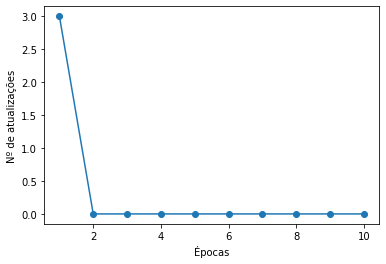

In [ ]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

###Plotando a fronteira de decisão

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


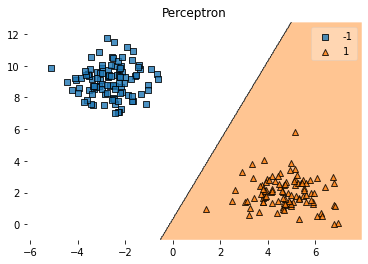

In [ ]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

###Criando um conjunto com 100 amostras

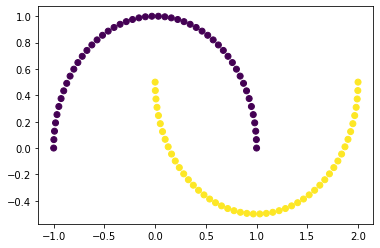

In [ ]:
moons = make_moons(n_samples=100)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1])
plt.show()

###Instanciando o Perceptron com taxa de aprendizado 0.5 e com 10 épocas e plotando o número de atualizações em função do número de épocas


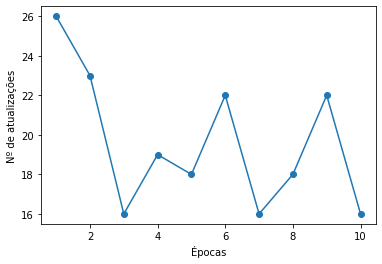

In [ ]:
ppn = Perceptron(n_iter=10, eta=0.5)
X = moons[0]
y = moons[1]
# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

###Analisando a fronteira de decisão

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


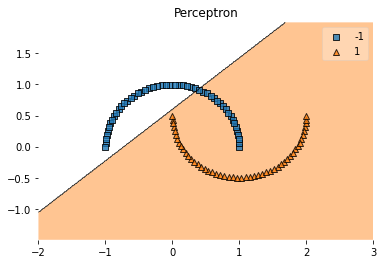

In [ ]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

# Primeiro Conjunto
*random_state:* 6

###Taxa de aprendizado: 0.02

* Com 10 épocas

* Com 50 épocas

* Com 100 épocas

###Taxa de aprendizado: 0.003

* Com 10 épocas

* Com 50 épocas

* Com 100 épocas

# Segundo Conjunto
*random_state*: 30

###Taxa de aprendizado: 0.02

* Com 10 épocas

* Com 50 épocas

* Com 100 épocas

###Taxa de aprendizado: 0.003

* Com 10 épocas

* Com 50 épocas

* Com 100 épocas